# K-Means Clustering on the Iris dataset.

Step:01 Libraries import

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Stpe:04 USed Load IRis function used

In [33]:
Iris = load_iris()

Step:05 Iris dataset convert in to dataframe in which columns equal to iris features

In [34]:
df= pd.DataFrame(Iris.data,columns=Iris.feature_names)


## Step 3: Standardize the data

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

<Axes: >

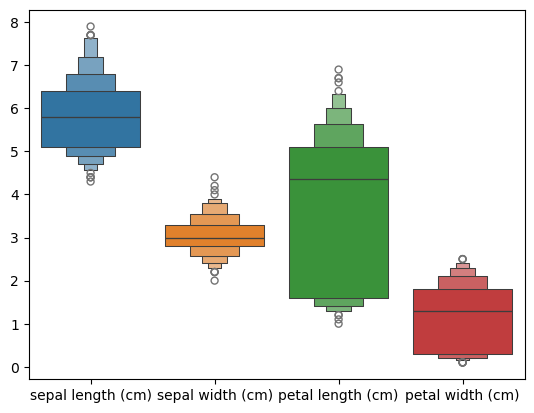

In [36]:
sns.boxenplot(data=df)

# Step 4: Remove Outliers using Z-score method

In [37]:
from scipy.stats import zscore
z_scores = zscore(scaled_data)
filtered_data = scaled_data[(abs(z_scores) < 3).all(axis=1)]

# Step 5: Apply K-Means Clustering

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(filtered_data)

c:\Users\Hafsa\miniconda3\envs\python_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Step 6: Apply PCA for visualization (2D)

In [41]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# Step 7: Create a dataframe for plotting

In [42]:
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# Step 8: Visualize the clusters

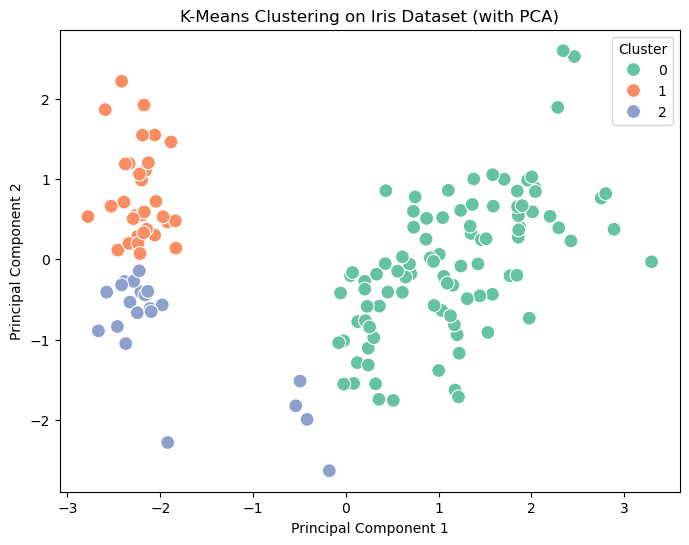

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clustering on Iris Dataset (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
